
**Team ID - Team 8**

**B Div - 5th Sem - CSE**

**Hostile Post Detection in Hindi - 5DMACP17**

**Goals:** To predict the label set of the set of post collected from Twitter and facebook.

**Traning data:** post with their label.

**Tesing data:** set of posts.

**Types of post:**

Fake News: A claim or information that is verified to be not true.

Hate Speech: A post targeting a specific group of people based on their ethnicity, religious beliefs, geographical belonging, race, etc., with malicious intentions of spreading hate or encouraging violence.

Offensive: A post containing profanity, impolite, rude, or vulgar language to insult a targeted individual or group.

Defamation: A mis-information regarding an individual or group.

Non-hostile: A post without any hostility.

dataset.csv: contains trainng data.



**Team**

Kirti Kunj Bajbai - 01fe18bcs094 - 222

Naman Anand - 01fe18bcs119 - 247

Himanshu Mishra - 01fe18bcs081 - 209

Gunjan Mahajan - 01fe18bcs078 - 206

In [1]:
# importing libraries
import pandas as pd     
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth',1)


**load data**

In [2]:
data = pd.read_csv("dataset.csv")

**How many posts do we have in training set**

In [3]:
print("We have", data.shape[0], "posts in the training set.")

We have 5728 posts in the training set.


**First and last five posts of dataset**

In [4]:
data.head()

,Unique ID,Post,Labels Set,Unnamed: 3,Unnamed: 4
0,1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive",NaN,NaN
1,2,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\nhttps://t.co/8iy2MJSBAs",non-hostile,NaN,NaN
2,3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE : https://t.co/G945HvzM0Z https://t.co/KfH7xF1IdM",non-hostile,NaN,NaN
3,4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive",NaN,NaN
4,5,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे. https://t.co/4e6lysg0VR,non-hostile,NaN,NaN


In [5]:
data.tail()

,Unique ID,Post,Labels Set,Unnamed: 3,Unnamed: 4
5723,5724,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate,NaN,NaN
5724,5725,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\nhttps://t.co/YaFEzPhTDC #NirvendraMishra @Uppolice @UPGovt",non-hostile,NaN,NaN
5725,5726,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं https://t.co/l6kFR8eiBf #HelpYourFriend #Jobless #COVID19 https://t.co/YOKsAyndNa",non-hostile,NaN,NaN
5726,5727,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n,fake,NaN,NaN
5727,5728,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति #PranabMukherjee के निधन पर शोक व्यक्त किया\n\nविवरण : https://t.co/aLE7aVtWy9,non-hostile,NaN,NaN


**Information about the attributes and tupples.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unique ID   5728 non-null   int64  
 1   Post        5728 non-null   object 
 2   Labels Set  5728 non-null   object 
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 223.9+ KB


**removing extra columns**

In [7]:
data=data.drop(data.columns[[0,3,4]], axis=1)

**New information of data**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post        5728 non-null   object
 1   Labels Set  5728 non-null   object
dtypes: object(2)
memory usage: 89.6+ KB


In [9]:
data.head()

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive"
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\nhttps://t.co/8iy2MJSBAs",non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE : https://t.co/G945HvzM0Z https://t.co/KfH7xF1IdM",non-hostile
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे. https://t.co/4e6lysg0VR,non-hostile


In [10]:
data.tail()

,Post,Labels Set
5723,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate
5724,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\nhttps://t.co/YaFEzPhTDC #NirvendraMishra @Uppolice @UPGovt",non-hostile
5725,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं https://t.co/l6kFR8eiBf #HelpYourFriend #Jobless #COVID19 https://t.co/YOKsAyndNa",non-hostile
5726,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n,fake
5727,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति #PranabMukherjee के निधन पर शोक व्यक्त किया\n\nविवरण : https://t.co/aLE7aVtWy9,non-hostile


**Calculating the null values in each columns**

In [11]:
data.isnull().sum()

Post          0
Labels Set    0
dtype: int64

**Number of columns and rows in train data set**

In [12]:

data.shape
print(data.shape,"is the dimension of the data")

(5728, 2) is the dimension of the data


**Checking for the duplicates in the dataset.**

In [13]:
print(len(data['Post'])-len(set(data['Post'])))

10


**Calculating the number and percentage of different types of post.**

In [14]:
d={}
total=0
for i in data['Labels Set']:
    ar=list(i.split(','))
    for j in ar:
        try:
            d[j]+=1
        except:
            d[j]=1
        total+=1


percentageHolder={}
for i in d:
    percentageHolder[i]=str((d[i]/total)*100)[:5]+'%'



table={'count':d,'percentage':percentageHolder}
print(pd.DataFrame(table))

             count percentage
hate         792    12.58%   
offensive    742    11.79%   
non-hostile  3050   48.47%   
defamation   564    8.963%   
fake         1144   18.18%   


**Represntation of label**

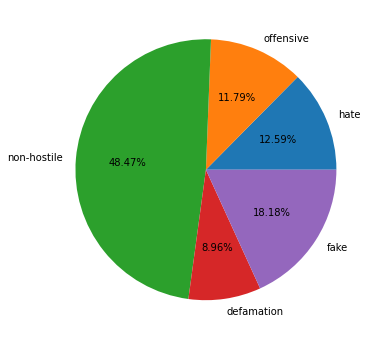

In [15]:
#pie chart creation

labels = list(d.keys())
values = list(d.values())
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,autopct="%1.2f%%")
plt.show()

Analysis:

Data is biased towards non-hostile post.

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

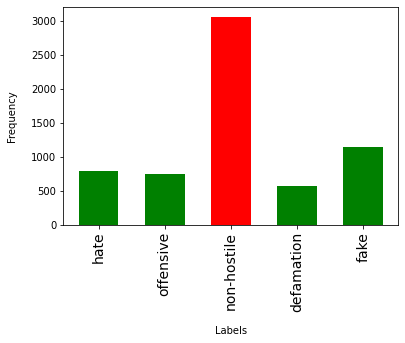

In [16]:
# Bar Plot
plt.bar(d.keys(), d.values(), 0.6, color=['g','g','r','g','g'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)

Analysis:

1) We observe that non-hostile posts has the highest proportion i.e more than 3000.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post        5728 non-null   object
 1   Labels Set  5728 non-null   object
dtypes: object(2)
memory usage: 89.6+ KB


**Preprocessing for KDD 1**

In [18]:
#Checking if the duplicate posts have duplicate labels or not

temp=set()
d={}
index=0
for i in data['Post']:
    if i not in temp:
        temp.add(i)
        d[i]=[[data['Labels Set'][index],index]]
    else:
        d[i].append([data['Labels Set'][index],index])
        print(d[i])
    index+=1

[['fake', 1102], ['fake', 2670]]
[['offensive', 2733], ['offensive', 3128]]
[['hate', 1135], ['hate', 3217]]
[['hate,offensive', 3086], ['hate,offensive', 3409]]
[['hate,offensive', 1372], ['hate,offensive', 4523]]
[['defamation,offensive', 2850], ['defamation,offensive', 4655]]
[['hate', 2467], ['defamation,offensive', 4970]]
[['offensive', 153], ['offensive', 5037]]
[['offensive', 153], ['offensive', 5037], ['offensive', 5425]]
[['hate,offensive', 1372], ['hate,offensive', 4523], ['hate,offensive', 5550]]


**Removing Duplicate rows**

In [19]:
#removing duplicate rows

postTemp={'Post':[],'Labels Set':[]}
visited=set()
index=0

for i in data['Post']:
    if i not in visited and index!=4970:
        postTemp['Post'].append(i)
        postTemp['Labels Set'].append(data['Labels Set'][index])
        visited.add(i)
    index+=1
        
data=pd.DataFrame.from_dict(postTemp)

data

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive"
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\nhttps://t.co/8iy2MJSBAs",non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE : https://t.co/G945HvzM0Z https://t.co/KfH7xF1IdM",non-hostile
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे. https://t.co/4e6lysg0VR,non-hostile
...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate
5714,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\nhttps://t.co/YaFEzPhTDC #NirvendraMishra @Uppolice @UPGovt",non-hostile
5715,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं https://t.co/l6kFR8eiBf #HelpYourFriend #Jobless #COVID19 https://t.co/YOKsAyndNa",non-hostile
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n,fake


In [20]:
labelPost={}
punchCnt={}
hashCnt={}
mentionCnt={}

f=open("punctuations.txt","r")
puch=set(f.read().split('\n'))


for i in range(len(data['Post'])):
    for j in list(data['Labels Set'][i].split(',')):
        try:
            labelPost[j].append(data['Post'][i])
        except:
            labelPost[j]=[(data['Post'][i])]
        

#check for Punctuations

for i in labelPost:
    for j in labelPost[i]:
        for char in j:
            if char in puch:
                try:
                    punchCnt[i]+=1
                except:
                    punchCnt[i]=1

for i in labelPost:
    for j in labelPost[i]:
        for char in j:
            if char == '#':
                try:
                    hashCnt[i]+=1
                except:
                    hashCnt[i]=1
                    
for i in labelPost:
    for j in labelPost[i]:
        for char in j:
            if char == '@':
                try:
                    mentionCnt[i]+=1
                except:
                    mentionCnt[i]=1
                    
for i in punchCnt:
    punchCnt[i]/=len(labelPost[i])
for i in hashCnt:
    hashCnt[i]/=len(labelPost[i])
for i in mentionCnt:
    mentionCnt[i]/=len(labelPost[i])
    
print(punchCnt,hashCnt,mentionCnt)

{'hate': 4.361675126903553, 'offensive': 4.1961852861035425, 'non-hostile': 9.021311475409837, 'defamation': 4.329181494661921, 'fake': 3.583552055993001} {'hate': 0.35913705583756345, 'offensive': 0.2997275204359673, 'non-hostile': 1.0859016393442622, 'defamation': 0.2846975088967972, 'fake': 0.23184601924759404} {'hate': 0.6294416243654822, 'offensive': 0.9373297002724795, 'non-hostile': 0.6888524590163935, 'defamation': 0.6209964412811388, 'fake': 0.23184601924759404}


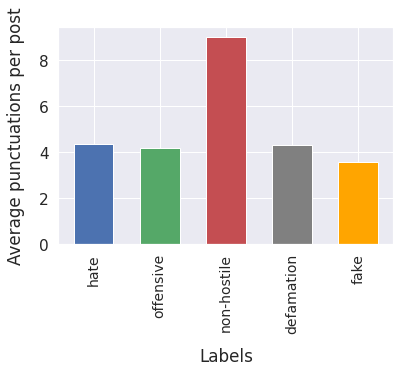

In [21]:
#avg punctuations
plt.bar(list(punchCnt.keys()), list(punchCnt.values()), 0.6, color=['b','g','r','grey','orange'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Average punctuations per post", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)
# for index, value in enumerate(punchCnt.values()):
#     plt.text(value, index, str(value))
plt.show()

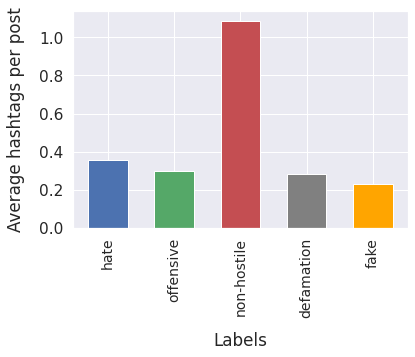

In [22]:
#avg hashtags
plt.bar(hashCnt.keys(), hashCnt.values(), 0.6, color=['b','g','r','grey','orange'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Average hashtags per post", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)
plt.show()

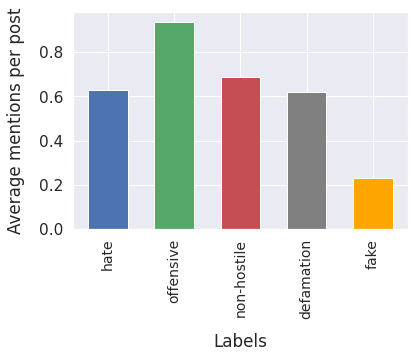

In [23]:
#avg mentions
plt.bar(mentionCnt.keys(), mentionCnt.values(), 0.6, color=['b','g','r','grey','orange'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Average mentions per post", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [24]:
#removing urls & mentions from the string

data['Post'] = data['Post'].str.replace('http\S+|www.\S+|@\S+', '', case=False)

data

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive"
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\n",non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE :",non-hostile
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे.,non-hostile
...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate
5714,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\n #NirvendraMishra",non-hostile
5715,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं #HelpYourFriend #Jobless #COVID19",non-hostile
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n,fake


In [25]:
#separating Hashtags
ht=[]


for i in data['Post']:
    temp=[]
    start=0
    for j in i:
        if j=='#':
            start=1
            holder=''
        if j==' ' and start:
            start=0
            temp.append(holder)
            
        elif start==1:
            holder+=j
    ht.append(temp)
            
data['Hashtag']=ht

data['Post'] = data['Post'].str.replace('#\S+', '', case=False)


hashtag = data['Hashtag']
tmp = data
tmp=tmp.drop(tmp.columns[[2]], axis=1)

data


,Post,Labels Set,Hashtag
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive",[]
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\n",non-hostile,[]
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर :",non-hostile,[#LIVE]
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive",[]
4,- अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे.,non-hostile,[#unlock4guidelines]
...,...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate,[]
5714,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\n",non-hostile,[#NirvendraMishra]
5715,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं",non-hostile,"[#HelpYourFriend, #Jobless, #COVID19]"
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता – कुमार\n\n,fake,[#रविश]


In [26]:
#removing Punctuations

f=open("punctuations.txt","r")
punctuations=set(f.read().split('\n'))
index=0

for i in data['Post']:
    temp=''
    for j in i:
        if j not in punctuations:
            temp+=j
        else:
            temp+=' '
    data['Post'][index]=temp
    index+=1
    
data

,Post,Labels Set,Hashtag
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"hate,offensive",[]
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई नई स्कीमें लाती रहती है ताकि उन पर ज्यादा आर्थिक बोझ न पड़े \n\n,non-hostile,[]
2,सुशांत ने जो बिजनेस डील 9 जून को की थी वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई देखिए पूछता है भारत अर्नब के साथ रिपब्लिक भारत पर,non-hostile,[#LIVE]
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"defamation,offensive",[]
4,अनलॉक 4 के लिए गाइडलाइन्स जारी\n\n 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n कंटेनमेंट जोन में कोई छूट नहीं\n सिनेमाहॉल अभी बंद रहेंगे\n 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे,non-hostile,[#unlock4guidelines]
...,...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,hate,[]
5714,उप्र पीएम रिपोर्ट में खुलासा हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत शरीर पर नहीं मिले चोट के निशान बेटे ने पिटाई कर हत्या का दावा किया था\n,non-hostile,[#NirvendraMishra]
5715,नौकरी गंवा चुके दोस्त की मदद नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें चुका सकते हैं नेटफ्लिक्स और जिम की फीस हालचाल जानें लेकिन ज्यादा नहीं,non-hostile,"[#HelpYourFriend, #Jobless, #COVID19]"
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता कुमार\n\n,fake,[#रविश]


In [27]:
#removing stop words 

f=open("stopWords.txt","r")
stopWords=set(f.read().split('\n'))

index=0

for i in data['Post']:
    temp=''
    words=i.split(' ')
    for j in words:
        if j not in stopWords:
            temp+=j
            temp+=' '
    data['Post'][index]=temp
    index+=1

data


,Post,Labels Set,Hashtag
0,मेरे देश के हिन्दु निराले है। पक्के राम भक्त बाबर के साले \n\n🙏 जय श्री राम 🙏,"hate,offensive",[]
1,सरकार हमेशा किसानों कमाई बढ़ाने के नई नई स्कीमें लाती ताकि आर्थिक बोझ न पड़े \n\n,non-hostile,[]
2,सुशांत बिजनेस डील 9 जून वो डील दीपेश सुशांत हत्या के दिन याद आई देखिए पूछता भारत अर्नब के रिपब्लिक भारत,non-hostile,[#LIVE]
3,साले जेएनयू छाप कमिने लोग हिन्दुओं संविधान सबको बराबर अधिकार देता है। सच्चाई बराबर अधिकार नहीं देता है।,"defamation,offensive",[]
4,अनलॉक 4 के गाइडलाइन्स जारी\n\n 7 सितंबर देशभर मेट्रो सेवा शुरु होगी\n 21 सितंबर के रैलियों बाकी फंक्शन 100 लोगों इजाजत\n कंटेनमेंट जोन छूट नहीं\n सिनेमाहॉल रहेंगे\n 9 12वीं के छात्र 21 सितंबर के स्कूल सकेंगे,non-hostile,[#unlock4guidelines]
...,...,...,...
5713,उदितराज जी हिम्मत जुटा नेता के कह दीजिये जिसके स्वागत मुंबई स्टेशन पाकिस्तान जिंदाबाद के नारे लगे विरोध दें मान्य होगा देशभक्त वरना अनर्गल प्रलाप न,hate,[]
5714,उप्र पीएम रिपोर्ट खुलासा हार्टअटैक पूर्व विधायक निर्वेंद्र मौत शरीर नहीं मिले चोट के निशान बेटे पिटाई हत्या दावा था\n,non-hostile,[#NirvendraMishra]
5715,नौकरी गंवा चुके दोस्त मदद नगद के बजाए गिफ्ट कार्ड देने के बारे सोचें चुका नेटफ्लिक्स जिम फीस हालचाल जानें नहीं,non-hostile,"[#HelpYourFriend, #Jobless, #COVID19]"
5716,बंगाल हिन्दू मरे मुझे फर्क नहीं पड़ता कुमार\n\n,fake,[#रविश]


In [28]:
#separating emojis

emojis=[]
index=0

for i in data['Post']:
    post=""
    temp=[]
    for j in i:
        if (u'\u0900' <= j <= u'\u097f' or j==' ' or j.isdigit() or j=='\n' or j.isalpha()):
            post+=j
        else:
            temp.append(j)
    emojis.append(temp)
    data['Post'][index]=post
    index=0
    
data['emojis']=emojis

data

,Post,Labels Set,Hashtag,emojis
0,रक्षा मंत्री पूर्व राष्ट्रपति के निधन शोक व्यक्त किया\n\nविवरण,"hate,offensive",[],"[🙏, 🙏]"
1,सरकार हमेशा किसानों कमाई बढ़ाने के नई नई स्कीमें लाती ताकि आर्थिक बोझ न पड़े \n\n,non-hostile,[],[]
2,सुशांत बिजनेस डील 9 जून वो डील दीपेश सुशांत हत्या के दिन याद आई देखिए पूछता भारत अर्नब के रिपब्लिक भारत,non-hostile,[#LIVE],[]
3,साले जेएनयू छाप कमिने लोग हिन्दुओं संविधान सबको बराबर अधिकार देता है। सच्चाई बराबर अधिकार नहीं देता है।,"defamation,offensive",[],[]
4,अनलॉक 4 के गाइडलाइन्स जारी\n\n 7 सितंबर देशभर मेट्रो सेवा शुरु होगी\n 21 सितंबर के रैलियों बाकी फंक्शन 100 लोगों इजाजत\n कंटेनमेंट जोन छूट नहीं\n सिनेमाहॉल रहेंगे\n 9 12वीं के छात्र 21 सितंबर के स्कूल सकेंगे,non-hostile,[#unlock4guidelines],[]
...,...,...,...,...
5713,उदितराज जी हिम्मत जुटा नेता के कह दीजिये जिसके स्वागत मुंबई स्टेशन पाकिस्तान जिंदाबाद के नारे लगे विरोध दें मान्य होगा देशभक्त वरना अनर्गल प्रलाप न,hate,[],[]
5714,उप्र पीएम रिपोर्ट खुलासा हार्टअटैक पूर्व विधायक निर्वेंद्र मौत शरीर नहीं मिले चोट के निशान बेटे पिटाई हत्या दावा था\n,non-hostile,[#NirvendraMishra],[]
5715,नौकरी गंवा चुके दोस्त मदद नगद के बजाए गिफ्ट कार्ड देने के बारे सोचें चुका नेटफ्लिक्स जिम फीस हालचाल जानें नहीं,non-hostile,"[#HelpYourFriend, #Jobless, #COVID19]",[]
5716,बंगाल हिन्दू मरे मुझे फर्क नहीं पड़ता कुमार\n\n,fake,[#रविश],[]


**Translation of hindi data to english using googletrans API**

As the googletrans API takes a lot of time for translation so we have commented this portion of code. You can uncomment and run it if required. 

For that purpose we stored the result of below code in res.txt file

In [29]:
# #Translating hindi to english using "googletrans" API
# from googletrans import Translator
# import time
# errorCounter=0
# cnt=0
# eng=[]
# f = open("res.txt", "a")
# f.write("Now the file has more content!")
# for i in range(5728):
#     t=Translator()
#     cnt+=1
#     time.sleep(5)
    
#     print(cnt,errorCounter)
#     # if i%5==0:
#     #     time.sleep(1)
#     try:
#         f.write(t.translate(translationInput[i]).text)
#         f.write('\n')
#     except:
#         errorCounter+=1
# print("Total Loss = " + str(errorCounter))

In [30]:
#lowercasing 

f = open("res.txt", "r")
englishPost=list(f.read().split('\n'))

for i in range(len(englishPost)):
    englishPost[i]=englishPost[i].lower()

engDF=pd.DataFrame.from_dict({'English Post':englishPost})
engDF

,English Post
0,now the file has more content!my country is hindu very unique in. something is sure ram devotee and brother of babar jai shri ram
1,sushant has a business deal was june they deal dipesh is sushant asks killing day see i only remember why the republic of india arnab india
2,brother jnu impression kmine people constitution hindus say it gives everyone equal rights. the truth is that it does not have equal rights.
3,"after september unlock starts across metro service in september issued guidelines rallies and cinema, there is no rest allowed containment zone in function will be closed from now will be the school after the student september th"
4,record case in the country
...,...
2900,can in the next hours is arrested rhea caught another drug padlr
2901,we have seen born dogs in the house of a staunch hindu lion is seen lick tlve of these dogs.
2902,up pm report revealing was the hartatak former legislator nirvendra death marks son did not harm the body claimed the killing was beating
2903,can already think about giving gift cards instead of jobs lost cash with the help of friends learn netflix and doing gym fees but not much


In [31]:
#Stemming

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer()
index=0

for i in englishPost:
    sentence=''
    for word in i:
        sentence+=ps.stem(word)
    englishPost[index]=sentence
    index+=0

data = tmp   
engDF=pd.DataFrame.from_dict({'English Post':englishPost})
engDF

,English Post
0,
1,sushant has a business deal was june they deal dipesh is sushant asks killing day see i only remember why the republic of india arnab india
2,brother jnu impression kmine people constitution hindus say it gives everyone equal rights. the truth is that it does not have equal rights.
3,"after september unlock starts across metro service in september issued guidelines rallies and cinema, there is no rest allowed containment zone in function will be closed from now will be the school after the student september th"
4,record case in the country
...,...
2900,can in the next hours is arrested rhea caught another drug padlr
2901,we have seen born dogs in the house of a staunch hindu lion is seen lick tlve of these dogs.
2902,up pm report revealing was the hartatak former legislator nirvendra death marks son did not harm the body claimed the killing was beating
2903,can already think about giving gift cards instead of jobs lost cash with the help of friends learn netflix and doing gym fees but not much


In [32]:
#removing stop words from english

f=open("stopWordsEnglish.txt","r")
stopWordsEnglish=set(f.read().split('\n'))

index=0

for i in englishPost:
    words=i.split(' ')
    sentence=''
    for word in words:
        if word not in stopWordsEnglish:
            sentence+=word
    englishPost[index]=sentence
    index=0

engDF=pd.DataFrame.from_dict({'English Post':englishPost})
engDF


,English Post
0,
1,sushant has a business deal was june they deal dipesh is sushant asks killing day see i only remember why the republic of india arnab india
2,brother jnu impression kmine people constitution hindus say it gives everyone equal rights. the truth is that it does not have equal rights.
3,"after september unlock starts across metro service in september issued guidelines rallies and cinema, there is no rest allowed containment zone in function will be closed from now will be the school after the student september th"
4,record case in the country
...,...
2900,can in the next hours is arrested rhea caught another drug padlr
2901,we have seen born dogs in the house of a staunch hindu lion is seen lick tlve of these dogs.
2902,up pm report revealing was the hartatak former legislator nirvendra death marks son did not harm the body claimed the killing was beating
2903,can already think about giving gift cards instead of jobs lost cash with the help of friends learn netflix and doing gym fees but not much


**Loading Validation Dataset**

In [33]:
test_df = pd.read_csv("./validation.csv")
test_df=test_df.drop(test_df.columns[[0]], axis=1)
test_df

,Post,Labels Set
0,दृढ़ इच्छा शक्ति से परिपूर्ण प्रणबदा के लिए देशहित सर्वोच्च रहा।\n\nउनका निधन हम सब के लिए अपूरणीय क्षति है।\nईश्वर दिवंगत आत्मा को अपने श्रीचरणों में स्थान दें। शोक संतप्त परिजनों के प्रति संवेदनाएं।\nऊं शांति!!!,non-hostile
1,भारतीय जनता पार्टी rss वाले इतने गिरे हुए हैं जहां मैं रहती हूं वहां मेरी जासूसी करा रहें है उसकी जासूस की पहचान मुझे अच्छी तरह है rss बीजेपी वाले की जासूस दिल्ली में कौन है उत्तर प्रदेश में कौन है हरियाणा राजस्थान में कौन है सबकी पहचान है मुझे मेरी नजर से बच नहीं सकते हो,defamation
2,"कोरोना से निपटने की तैयारी / दिल्ली में 10 हजार बेड वाला दुनिया का सबसे बड़ा कोविड केयर सेंटर शुरू, राजनाथ-शाह ने डीआरडीओ के 1 हजार बेड वाले सेंटर का भी उद्घाटन किया\nhttps://t.co/9rlQowAsFh #Delhi @ArvindKejriwal @rajnathsingh @AmitShah @DRDO_India @WHO @crpfindia @ITBP_official",non-hostile
3,गवर्नर कॉन्फ्रेंस में PM मोदी बोले- शिक्षा नीति में सरकार का दखल कम होना चाहिए\nhttps://t.co/ZvKgxk6dbd,non-hostile
4,"यूपी: गाजीपुर में Toilet घोटाला, प्रधान व सचिव ने किया लाखों का गबन, मुर्दों के नाम पर बनवा डाले शौचालय\n\n#UP\nhttps://t.co/hxM1uNNmX2",non-hostile
...,...,...
806,@ThePushpendra_ चंद फेंके हुए टुकड़ों के लिए हमेशा ही देश से गद्दारी को भौंकने तैयार\nड्रग्स के नशे में पूरी तरह खोखले हो चुके दाऊद के गुलाम देशद्रोही गद्दार फिल्मी भांडों के भोंकने को भी मीडिया ब्रेकिंग न्यूज़ बना\nइन दो कौड़ी के बिकाऊ नशेड़ी गद्दार कुत्तों को हीरो बना देती है\nदेश की विडंबना😔,hate
807,आँखों ही आँखों में इशारा हो गया \nबैठे बैठे जीने का सहारा हो गया 😉😉😉\nनज़रों की इस मारक क्षमता को क्या कहगे। 👌 https://t.co/Mt5EMJhpJb,defamation
808,"औरंगाबाद में फिर धीरे-धीरे पांव पसार रहा कोरोना संक्रमण, पिछले 6 दिनों में मिले इतने नए मरीज\n\n#Bihar #Corona #Aurangabad \n\nhttps://t.co/usE3PbXXlm",non-hostile
809,"बाइस्कोप: कादर के संवादों का कमाल, डिंपल की कलम का धमाल और तीन बत्ती के जग्गू का नाना संग असली बवाल\n#bioscope #Angaar #ShashilalNair #DimpleKapadia\n@bindasbhidu @nanagpatekar\n\nhttps://t.co/Lshm2G4qjO",non-hostile


In [34]:
test_df['Post'] = test_df['Post'].str.replace('http\S+|www.\S+|#\S+|@\S+', '', case=False)

**Converting Labels Set column into a list**

In [35]:
for i in range(len(data['Labels Set'])):
    data['Labels Set'][i]=list(data['Labels Set'][i].split(','))
for i in range(len(test_df['Labels Set'])):
    test_df['Labels Set'][i]=list(test_df['Labels Set'][i].split(','))


**Converting labels of a given post into binary representation**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(data['Labels Set'])
y

array([[0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [37]:
multilabel.classes_


array(['defamation', 'fake', 'hate', 'non-hostile', 'offensive'],
      dtype=object)

In [38]:
train_result=pd.DataFrame(y, columns=multilabel.classes_)
train_result = train_result.rename({'non-hostile': 'nh'}, axis=1)
train_result

,defamation,fake,hate,nh,offensive
0,0,0,1,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
5713,0,0,1,0,0
5714,0,0,0,1,0
5715,0,0,0,1,0
5716,0,1,0,0,0


In [39]:
te = multilabel.fit_transform(test_df['Labels Set'])
te
test_result=pd.DataFrame(te, columns=multilabel.classes_)
test_result = test_result.rename({'non-hostile': 'nh'}, axis=1)
test_result

,defamation,fake,hate,nh,offensive
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
806,0,0,1,0,0
807,1,0,0,0,0
808,0,0,0,1,0
809,0,0,0,1,0


In [40]:
train_df = pd.concat([data, train_result], axis=1, sort=False)
train_df

,Post,Labels Set,defamation,fake,hate,nh,offensive
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏,"[hate, offensive]",0,0,1,0,1
1,"सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\n",[non-hostile],0,0,0,1,0
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर :",[non-hostile],0,0,0,1,0
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।,"[defamation, offensive]",1,0,0,0,1
4,- अनलॉक-4 के लिए गाइडलाइन्स जारी\n\n- 7 सितंबर से देशभर में मेट्रो सेवा शुरु होगी\n- 21 सितंबर के बाद रैलियों और बाकी फंक्शन में 100 लोगों को इजाजत\n- कंटेनमेंट जोन में कोई छूट नहीं\n- सिनेमाहॉल अभी बंद रहेंगे\n- 9 से 12वीं के छात्र 21 सितंबर के बाद स्कूल जा सकेंगे.,[non-hostile],0,0,0,1,0
...,...,...,...,...,...,...,...
5713,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ कह दीजिये जिसके स्वागत में मुंबई स्टेशन पर पाकिस्तान जिंदाबाद के नारे लगे विरोध कर दें मान्य होगा की आप देशभक्त हैं वरना अनर्गल प्रलाप न करें,[hate],0,0,1,0,0
5714,"उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हुई थी पूर्व विधायक निर्वेंद्र की मौत; शरीर पर नहीं मिले चोट के निशान, बेटे ने पिटाई कर हत्या का दावा किया था\n",[non-hostile],0,0,0,1,0
5715,"नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं",[non-hostile],0,0,0,1,0
5716,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता – कुमार\n\n,[fake],0,1,0,0,0


In [41]:
test_df = pd.concat([test_df, test_result], axis=1, sort=False)
test_df

,Post,Labels Set,defamation,fake,hate,nh,offensive
0,दृढ़ इच्छा शक्ति से परिपूर्ण प्रणबदा के लिए देशहित सर्वोच्च रहा।\n\nउनका निधन हम सब के लिए अपूरणीय क्षति है।\nईश्वर दिवंगत आत्मा को अपने श्रीचरणों में स्थान दें। शोक संतप्त परिजनों के प्रति संवेदनाएं।\nऊं शांति!!!,[non-hostile],0,0,0,1,0
1,भारतीय जनता पार्टी rss वाले इतने गिरे हुए हैं जहां मैं रहती हूं वहां मेरी जासूसी करा रहें है उसकी जासूस की पहचान मुझे अच्छी तरह है rss बीजेपी वाले की जासूस दिल्ली में कौन है उत्तर प्रदेश में कौन है हरियाणा राजस्थान में कौन है सबकी पहचान है मुझे मेरी नजर से बच नहीं सकते हो,[defamation],1,0,0,0,0
2,"कोरोना से निपटने की तैयारी / दिल्ली में 10 हजार बेड वाला दुनिया का सबसे बड़ा कोविड केयर सेंटर शुरू, राजनाथ-शाह ने डीआरडीओ के 1 हजार बेड वाले सेंटर का भी उद्घाटन किया\n",[non-hostile],0,0,0,1,0
3,गवर्नर कॉन्फ्रेंस में PM मोदी बोले- शिक्षा नीति में सरकार का दखल कम होना चाहिए\n,[non-hostile],0,0,0,1,0
4,"यूपी: गाजीपुर में Toilet घोटाला, प्रधान व सचिव ने किया लाखों का गबन, मुर्दों के नाम पर बनवा डाले शौचालय\n\n\n",[non-hostile],0,0,0,1,0
...,...,...,...,...,...,...,...
806,चंद फेंके हुए टुकड़ों के लिए हमेशा ही देश से गद्दारी को भौंकने तैयार\nड्रग्स के नशे में पूरी तरह खोखले हो चुके दाऊद के गुलाम देशद्रोही गद्दार फिल्मी भांडों के भोंकने को भी मीडिया ब्रेकिंग न्यूज़ बना\nइन दो कौड़ी के बिकाऊ नशेड़ी गद्दार कुत्तों को हीरो बना देती है\nदेश की विडंबना😔,[hate],0,0,1,0,0
807,आँखों ही आँखों में इशारा हो गया \nबैठे बैठे जीने का सहारा हो गया 😉😉😉\nनज़रों की इस मारक क्षमता को क्या कहगे। 👌,[defamation],1,0,0,0,0
808,"औरंगाबाद में फिर धीरे-धीरे पांव पसार रहा कोरोना संक्रमण, पिछले 6 दिनों में मिले इतने नए मरीज\n\n \n\n",[non-hostile],0,0,0,1,0
809,"बाइस्कोप: कादर के संवादों का कमाल, डिंपल की कलम का धमाल और तीन बत्ती के जग्गू का नाना संग असली बवाल\n \n \n\n",[non-hostile],0,0,0,1,0


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

**Vectorization of all the Post**

In [43]:
vectorizer = CountVectorizer(binary=True)

vectorizer.fit(list(train_df['Post']) + list(test_df['Post']))


x_train_vec = vectorizer.transform(train_df['Post'])
x_test_vec = vectorizer.transform(test_df['Post'])

**Model building with SVM and tf-idf**

In [44]:
from sklearn import svm
# classify using support vector classifier
svm1 = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
svm1.fit(x_train_vec, train_df.nh.values)

# perform classification and prediction on samples in x_test
y_pred_svm1 = svm1.predict(x_test_vec)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_svm1,test_df.nh.values))

**Model building with Random Forest and tf-idf**

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=400,random_state=0)
rfc_model.fit(x_train_vec, train_df.nh.values)

y_pred_rfc = rfc_model.predict(x_test_vec)


In [ ]:
print(classification_report(y_pred_rfc,test_df.nh.values))

**m-BERT**

In [44]:
!pip install bert-embedding

     |████████████████████████████████| 29.6MB 111kB/s 
     |████████████████████████████████| 13.8MB 236kB/s 
     |████████████████████████████████| 215kB 47.5MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-cp37-none-any.whl size=259918 sha256=cfc9b37123fd420af7e79073ffd5b69426bd038a2f6d5c82846f29c1b2d493c1
  Stored in directory: /root/.cache/pip/wheels/ff/48/ac/a77c79aa416ba6dd7bf487f2280b0471034f66141617965914
Successfully built gluonnlp
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: umap-learn 0.5.1 has requirement numpy>=1.17, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tifffile 2021.2.26 has requirement numpy>=1.15.1, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.14.6 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: seaborn 0

In [45]:
!pip install mxnet-cu100

     |████████████████████████████████| 827.8MB 22kB/s 
     |████████████████████████████████| 15.3MB 217kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: mxnet 1.4.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: jaxlib 0.1.60+cuda101 has requirement numpy<1.20,>=1.12, but you'll have numpy 1.20.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bert-embedding 1.0.1 has requirement numpy==1.14.6, but you'll have numpy 1.20.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [46]:
!pip install sentence-transformers

     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 1.9MB 24.8MB/s 
     |████████████████████████████████| 1.2MB 52.4MB/s 
     |████████████████████████████████| 3.2MB 48.1MB/s 
     |████████████████████████████████| 890kB 54.7MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp37-none-any.whl size=103068 sha256=1fdc08759a542efd27fddee8851bc0f0755d657cc872bdefed9da2c7d1ddc66a
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=4dfa3fa6128f028b06b9ceac5b2e1752f2f8db807f814f2872f4e570d5234a8e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [47]:
import re
import itertools
import mxnet as mx
from bert_embedding import BertEmbedding
from sentence_transformers import SentenceTransformer

In [48]:
def mean(z): 
    return sum(itertools.chain(z))/len(z)

In [49]:
def wordTokenize(text):
  return word_tokenize(text)

In [50]:
def embeddToBERT(text):
    sentences = re.split('!|\?|\.',text)
    sentences = list(filter(None, sentences)) 

    
    result = bert_transformers.encode(sentences)
    feature = [mean(x) for x in zip(*result)]
  
    return feature

In [51]:
ctx = mx.gpu(0)
bert = BertEmbedding(ctx=ctx)

Vocab file is not found. Downloading.


**Downloading the BERT pre trained model**

In [52]:
bert_transformers = SentenceTransformer('bert-base-multilingual-uncased')

Exception when trying to download https://sbert.net/models/bert-base-multilingual-uncased.zip. Response 404


**Getting word embeddings from m-BERT**

In [57]:
bert_sentence_training_features = train_df['Post'].apply(embeddToBERT)
bert_sentence_test_features = test_df['Post'].apply(embeddToBERT)

**Converting the word embeddings into a np array**

In [58]:
feature = [x for x in bert_sentence_training_features.transpose()]
bert_sentence_training_features = np.asarray(feature)

feature = [x for x in bert_sentence_test_features.transpose()]
bert_sentence_test_features = np.asarray(feature)

print(bert_sentence_training_features.shape)

(5718, 768)


**Model building with SVM and m-BERT**

In [59]:
from sklearn.svm import SVC
model = SVC(kernel ='linear', C = 1)

In [60]:
# Training 
model.fit(bert_sentence_training_features, train_df.nh.values)
# Evaluation
y_pred_bert_sentence_svm = model.predict(bert_sentence_test_features)


In [61]:
print(classification_report(y_pred_bert_sentence_svm,test_df.nh.values))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       368
           1       0.90      0.89      0.90       443

    accuracy                           0.89       811
   macro avg       0.89      0.89      0.89       811
weighted avg       0.89      0.89      0.89       811



**Model building with Logistic Regression and m-BERT**

In [62]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty='l1',solver='liblinear')

In [63]:
#Training
lr_model.fit(bert_sentence_training_features, train_df.nh.values)
y_pred_bert_lr = lr_model.predict(bert_sentence_test_features)


In [64]:
print(classification_report(y_pred_bert_lr,test_df.nh.values))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       372
           1       0.89      0.88      0.88       439

    accuracy                           0.87       811
   macro avg       0.87      0.87      0.87       811
weighted avg       0.87      0.87      0.87       811



**KDD Iteration 2**

**XGBoost**

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
classifier = XGBClassifier( scale_pos_weight= 7)
classifier.fit(bert_sentence_training_features, train_df.nh.values)

In [ ]:
predictions = classifier.predict(bert_sentence_test_features)

In [ ]:
print(classification_report(y_test,predictions))

**Stacking**

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

# Initializing models
#train_cleanedtext1=train_cleanedtext.toarray()
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = SVC()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'logisticregression__C': [0.1, 10.0],
          'randomforestclassifier__n_estimators': [10, 450],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(bert_sentence_training_features, y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier

clf1 = LogisticRegression(penalty='l1',solver='liblinear',C=0.1)
clf2 = RandomForestClassifier(n_estimators=450)
clf3 = SVC(kernel='linear',C=1)
lr = LogisticRegression(C=0.1)


sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)

sclf.fit(bert_sentence_training_features,train_df.nh.values)

In [ ]:
pred = sclf.predict(bert_sentence_test_features)
print(classification_report(test_df.nh.values,pred))

**RoBERTa**

In [48]:
!git clone https://github.com/devkosal/fastai_roberta.git

fatal: destination path 'fastai_roberta' already exists and is not an empty directory.


In [49]:
!pip install fastai==1.0.60 transformers==2.3.0

In [50]:
import numpy as np
from fastai.text import *
from fastai.metrics import *
from transformers import RobertaTokenizer

In [51]:
# Creating a config object to store task specific information
class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)
        
config = Config(
    testing=True,
    seed = 2019,
    roberta_model_name='roberta-base', # can also be exchnaged with roberta-large 
    max_lr=1e-5,
    epochs=1,
    use_fp16=False,
    bs=4, 
    max_seq_len=256, 
    num_labels = 2,
    hidden_dropout_prob=.05,
    hidden_size=768, # 1024 for roberta-large
    start_tok = "<s>",
    end_tok = "</s>",
)

In [52]:
feat_cols = "Post"
label_cols = "nh"

**Setting Up the Tokenizer**

In [53]:

class FastAiRobertaTokenizer(BaseTokenizer):
    """Wrapper around RobertaTokenizer to be compatible with fastai"""
    def __init__(self, tokenizer: RobertaTokenizer, max_seq_len: int=128, **kwargs): 
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len 
    def __call__(self, *args, **kwargs): 
        return self 
    def tokenizer(self, t:str) -> List[str]: 
        """Adds Roberta bos and eos tokens and limits the maximum sequence length""" 
        return [config.start_tok] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + [config.end_tok]

In [54]:
# create fastai tokenizer for roberta
roberta_tok = RobertaTokenizer.from_pretrained("roberta-base")

fastai_tokenizer = Tokenizer(tok_func=FastAiRobertaTokenizer(roberta_tok, max_seq_len=config.max_seq_len), 
                             pre_rules=[], post_rules=[])

In [55]:
# create fastai vocabulary for roberta
path = Path()
roberta_tok.save_vocabulary(path)

with open('vocab.json', 'r') as f:
    roberta_vocab_dict = json.load(f)
    
fastai_roberta_vocab = Vocab(list(roberta_vocab_dict.keys()))

In [56]:

# Setting up pre-processors
class RobertaTokenizeProcessor(TokenizeProcessor):
    def __init__(self, tokenizer):
         super().__init__(tokenizer=tokenizer, include_bos=False, include_eos=False)

class RobertaNumericalizeProcessor(NumericalizeProcessor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)


def get_roberta_processor(tokenizer:Tokenizer=None, vocab:Vocab=None):
    """
    Constructing preprocessors for Roberta
    We remove sos and eos tokens since we add that ourselves in the tokenizer.
    We also use a custom vocabulary to match the numericalization with the original Roberta model.
    """
    return [RobertaTokenizeProcessor(tokenizer=tokenizer), RobertaNumericalizeProcessor(vocab=vocab)]

**Setting up the Databunch**

In [57]:
# Creating a Roberta specific DataBunch class
class RobertaDataBunch(TextDataBunch):
    "Create a `TextDataBunch` suitable for training Roberta"
    @classmethod
    def create(cls, train_ds, valid_ds, test_ds=None, path:PathOrStr='.', bs:int=64, val_bs:int=None, pad_idx=1,
               pad_first=True, device:torch.device=None, no_check:bool=False, backwards:bool=False, 
               dl_tfms:Optional[Collection[Callable]]=None, **dl_kwargs) -> DataBunch:
        "Function that transform the `datasets` in a `DataBunch` for classification. Passes `**dl_kwargs` on to `DataLoader()`"
        datasets = cls._init_ds(train_ds, valid_ds, test_ds)
        val_bs = ifnone(val_bs, bs)
        collate_fn = partial(pad_collate, pad_idx=pad_idx, pad_first=pad_first, backwards=backwards)
        train_sampler = SortishSampler(datasets[0].x, key=lambda t: len(datasets[0][t][0].data), bs=bs)
        train_dl = DataLoader(datasets[0], batch_size=bs, sampler=train_sampler, drop_last=True, **dl_kwargs)
        dataloaders = [train_dl]
        for ds in datasets[1:]:
            lengths = [len(t) for t in ds.x.items]
            sampler = SortSampler(ds.x, key=lengths.__getitem__)
            dataloaders.append(DataLoader(ds, batch_size=val_bs, sampler=sampler, **dl_kwargs))
        return cls(*dataloaders, path=path, device=device, dl_tfms=dl_tfms, collate_fn=collate_fn, no_check=no_check)

In [58]:
class RobertaTextList(TextList):
    _bunch = RobertaDataBunch
    _label_cls = TextList

In [59]:
# loading the tokenizer and vocab processors
processor = get_roberta_processor(tokenizer=fastai_tokenizer, vocab=fastai_roberta_vocab)

In [60]:
# creating our databunch 
data = RobertaTextList.from_df(train_df, ".", cols=feat_cols, processor=processor) \
    .split_by_rand_pct(seed=config.seed) \
    .label_from_df(cols=label_cols,label_cls=CategoryList) \
    .databunch(bs=config.bs, pad_first=False, pad_idx=0)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [61]:

data

RobertaDataBunch;

Train: LabelList (4575 items)
x: RobertaTextList
<s> à¤ ® à¥ ĩ à¤ ° à¥ ĩ Ġà¤ ¦ à¥ ĩ à¤ ¶ Ġà¤ ķ à¥ ĩ Ġà¤ ¹ à¤ ¿ à¤ ¨ à¥ į à¤ ¦ à¥ ģ Ġà¤ ¬ à¤ ¹ à¥ ģ à¤ ¤ Ġà¤ ¨ à¤ ¿ à¤ ° à¤¾ à¤ ² à¥ ĩ Ġà¤ ¹ à¥ Ī à¥ ¤ Ġà¤ ķ à¥ ģ à¤ Ľ Ġà¤ ¤ à¥ ĭ Ġà¤ ª à¤ ķ à¥ į à¤ ķ à¥ ĩ Ġà¤ ° à¤¾ à¤ ® Ġà¤ Ń à¤ ķ à¥ į à¤ ¤ Ġà¤ ¹ à¥ Ī Ġà¤ Ķ à¤ ° Ġà¤ ķ à¥ ģ à¤ Ľ Ġà¤ ¬ à¤¾ à¤ ¬ à¤ ° Ġà¤ ķ à¥ ĩ Ġà¤ ¸ à¤¾ à¤ ² à¥ ĩ Ġà¤ ¹ à¥ Ī Ġ Ċ Ċ ðŁ Ļ ı Ġà¤ ľ à¤ ¯ Ġà¤ ¶ à¥ į à¤ ° à¥ Ģ Ġà¤ ° à¤¾ à¤ ® ĠðŁ Ļ ı </s>,<s> à¤ ¸ à¤ ° à¤ ķ à¤¾ à¤ ° Ġà¤ ¹ à¤ ® à¥ ĩ à¤ ¶ à¤¾ Ġà¤ ¸ à¥ ĩ Ġà¤ ķ à¤ ¿ à¤ ¸ à¤¾ à¤ ¨ à¥ ĭ à¤ Ĥ Ġà¤ ķ à¥ Ģ Ġà¤ ķ à¤ ® à¤¾ à¤ Ī Ġà¤ ķ à¥ ĭ Ġà¤ ¬ à¤ ¢ à¤ ¼ à¤¾ à¤ ¨ à¥ ĩ Ġà¤ ķ à¥ ĩ Ġà¤ ² à¤ ¿ à¤ ı Ġà¤ ¨ à¤ Ī - à¤ ¨ à¤ Ī Ġà¤ ¸ à¥ į à¤ ķ à¥ Ģ à¤ ® à¥ ĩ à¤ Ĥ Ġà¤ ² à¤¾ à¤ ¤ à¥ Ģ Ġà¤ ° à¤ ¹ à¤ ¤ à¥ Ģ Ġà¤ ¹ à¥ Ī , Ġà¤ ¤ à¤¾ à¤ ķ à¤ ¿ Ġà¤ ī à¤ ¨ Ġà¤ ª à¤ ° Ġà¤ ľ à¥ į à¤ ¯ à¤¾ à¤ ¦ à¤¾ Ġà¤ Ĩ à¤ ° à¥ į à¤ ¥ à¤ ¿ à¤ ķ Ġà¤ ¬ à¥ ĭ à¤ Ŀ Ġà¤ ¨ Ġà¤ ª à¤ ¡ à¤ ¼ à¥ ĩ . </s>,<s> à¤ ¸ à¤¾ à¤ ² à¥ ĩ Ġà¤ ľ à¥ ĩ à¤ ı à¤ ¨ à¤ ¯ à¥ Ĥ Ġà¤ 

**Building the model**

In [62]:
import torch
import torch.nn as nn
from transformers import RobertaModel

# defining our model architecture 
class CustomRobertaModel(nn.Module):
    def __init__(self,num_labels=2):
        super(CustomRobertaModel,self).__init__()
        self.num_labels = num_labels
        self.roberta = RobertaModel.from_pretrained(config.roberta_model_name)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, num_labels) # defining final output layer
        
    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        _ , pooled_output = self.roberta(input_ids, token_type_ids, attention_mask) # 
        logits = self.classifier(pooled_output)        
        return logits

In [63]:

roberta_model = CustomRobertaModel(num_labels=config.num_labels)

learn = Learner(data, roberta_model, metrics=[accuracy])

In [64]:
learn.model.roberta.train() # setting roberta to train as it is in eval mode by default
learn.fit_one_cycle(config.epochs, max_lr=config.max_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.442029,0.428130,0.812773,03:57


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [65]:
def get_preds_as_nparray(ds_type) -> np.ndarray:
    learn.model.roberta.eval()
    preds = learn.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in data.dl(ds_type).sampler]
    reverse_sampler = np.argsort(sampler)
    ordered_preds = preds[reverse_sampler, :]
    pred_values = np.argmax(ordered_preds, axis=1)
    return ordered_preds, pred_values

In [66]:
preds, pred_values = get_preds_as_nparray(DatasetType.Valid)


In [ ]:
# accuracy on valid
(pred_values == data.valid_ds.y.items).mean()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data.valid_ds.y.items,pred_values))

**Hinglish BERT**

In [53]:
import random

In [54]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
import torch
MODEL_NAME = 'verloop/Hinglish-Bert'
# Use a GPU if you have one available (Runtime -> Change runtime type -> GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set seeds for reproducibility
random.seed(26)
np.random.seed(26)
torch.manual_seed(26)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME) 

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.to(device) # Send the model to the GPU if we have one

Some weights of the model checkpoint at verloop/Hinglish-Bert were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at verloop/Hinglish-Bert a

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [60]:
import time
import time
import datetime
from sklearn.metrics import accuracy_score, classification_report

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    
    return str(datetime.timedelta(seconds=elapsed_rounded))
batch_size = 8
max_length = 256

def X_process(sentences):
    input_ids = []
    attention_masks = []

    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_length,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                       )

        input_ids.append(encoded_dict['input_ids'])

        attention_masks.append(encoded_dict['attention_mask'])
    return input_ids, attention_masks


def train_load(input_ids, attention_masks, labels):
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)

    train_dataset = TensorDataset(input_ids, attention_masks, labels)
    train_dataloader = DataLoader(
                train_dataset,  # The training samples.
                sampler = SequentialSampler(train_dataset), # Select batches sequentially
                batch_size = batch_size # Trains with this batch size.
            )
    return train_dataloader

def val_load(input_ids, attention_masks, labels):
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)

    val_dataset = TensorDataset(input_ids, attention_masks, labels)
    validation_dataloader = DataLoader(
                val_dataset, # The validation samples.
                sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
                batch_size = batch_size # Evaluate with this batch size.
            )
    
    return validation_dataloader

def test_load(input_ids, attention_masks):
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    test_dataset = TensorDataset(input_ids, attention_masks)
    test_dataloader = DataLoader(
                test_dataset, # The validation samples.
                sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
                batch_size = batch_size # Evaluate with this batch size.
            )
    
    return test_dataloader

def train_fn(train_dataloader, validation_dataloader):
    
    seed_val = 42

    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    training_stats = []

    total_t0 = time.time()
    for epoch_i in range(0, 2):

        
        print('Training...')

        t0 = time.time()

        total_train_loss = 0

        model.train()

        for step, batch in enumerate(train_dataloader):

            if step % 40 == 0 and not step == 0:
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            model.zero_grad()        

            state = model(b_input_ids, 
                                 token_type_ids=None, 
                                 attention_mask=b_input_mask, 
                                 labels=b_labels)
            loss = state.loss
            logits = state.logits

            total_train_loss += loss.item()

            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()

            scheduler.step()

        avg_train_loss = total_train_loss / len(train_dataloader)            

        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training took: {:}".format(training_time))

        print("")
        print("Running Validation...")

        t0 = time.time()

        model.eval()

        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0
        
        y_pred_val = []

        for batch in validation_dataloader:

            
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            with torch.no_grad():        

                state = model(b_input_ids, 
                                       token_type_ids=None, 
                                       attention_mask=b_input_mask,
                                       labels=b_labels)
                loss = state.loss
                logits = state.logits

            total_eval_loss += loss.item()

            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            total_eval_accuracy += flat_accuracy(logits, label_ids)
            preds = logits
            
            pred_flat = np.argmax(preds, axis=1).flatten()
            y_pred_val.extend(pred_flat)


        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

        avg_val_loss = total_eval_loss / len(validation_dataloader)

        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )
        print(training_stats)
        
    return training_stats, y_pred_val




def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


def evaluation(y_true, y_pred):
  print("Fine Grained Accuracy = {}".format(accuracy_score(y_true, y_pred)))
  print("\n\nFine Grained Metrics\n")
  print(classification_report(y_true, y_pred))

In [61]:
from torch.utils.data import TensorDataset, random_split 
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

print("**********NH**********")
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

y_train = train_df.nh.values
y_test = test_df.nh.values

train_labels_non_hostile = train_df.nh.values
val_labels_non_hostile = test_df.nh.values

input_ids, attention_masks = X_process(train_df['Post'])
train_dataloader = train_load(input_ids, attention_masks, train_labels_non_hostile)

input_ids, attention_masks = X_process(test_df['Post'])
validation_dataloader = val_load(input_ids, attention_masks, val_labels_non_hostile)

input_ids, attention_masks = X_process(train_df['Post'])
test_dataloader = test_load(input_ids, attention_masks)

from transformers import get_linear_schedule_with_warmup



total_steps = len(train_dataloader) * 2

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
training_stats, y_pred_val_non_hostile = train_fn(train_dataloader, validation_dataloader)
evaluation(y_test, y_pred_val_non_hostile)





#fake
print("**********fake**********")
from torch.utils.data import TensorDataset, random_split 
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

y_train = train_result.fake.values
y_test = test_result.fake.values

train_labels_non_hostile = train_result.fake.values
val_labels_non_hostile = test_result.fake.values

input_ids, attention_masks = X_process(train_df['Post'])
train_dataloader = train_load(input_ids, attention_masks, train_labels_non_hostile)

input_ids, attention_masks = X_process(test_df['Post'])
validation_dataloader = val_load(input_ids, attention_masks, val_labels_non_hostile)

input_ids, attention_masks = X_process(train_df['Post'])
test_dataloader = test_load(input_ids, attention_masks)

from transformers import get_linear_schedule_with_warmup



total_steps = len(train_dataloader) * 2

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
training_stats, y_pred_val_non_hostile = train_fn(train_dataloader, validation_dataloader)
evaluation(y_test, y_pred_val_non_hostile)





#offensive
print("**********offensive**********")
from torch.utils.data import TensorDataset, random_split 
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

y_train = train_result.offensive.values
y_test = test_result.offensive.values

train_labels_non_hostile = train_result.offensive.values
val_labels_non_hostile = test_result.offensive.values

input_ids, attention_masks = X_process(train_df['Post'])
train_dataloader = train_load(input_ids, attention_masks, train_labels_non_hostile)

input_ids, attention_masks = X_process(test_df['Post'])
validation_dataloader = val_load(input_ids, attention_masks, val_labels_non_hostile)

input_ids, attention_masks = X_process(train_df['Post'])
test_dataloader = test_load(input_ids, attention_masks)

from transformers import get_linear_schedule_with_warmup



total_steps = len(train_dataloader) * 2

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
training_stats, y_pred_val_non_hostile = train_fn(train_dataloader, validation_dataloader)
evaluation(y_test, y_pred_val_non_hostile)





#defamation
print("**********defamation**********")
from torch.utils.data import TensorDataset, random_split 
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

y_train = train_result.defamation.values
y_test = test_result.defamation.values

train_labels_non_hostile = train_result.defamation.values
val_labels_non_hostile = test_result.defamation.values

input_ids, attention_masks = X_process(train_df['Post'])
train_dataloader = train_load(input_ids, attention_masks, train_labels_non_hostile)

input_ids, attention_masks = X_process(test_df['Post'])
validation_dataloader = val_load(input_ids, attention_masks, val_labels_non_hostile)

input_ids, attention_masks = X_process(train_df['Post'])
test_dataloader = test_load(input_ids, attention_masks)

from transformers import get_linear_schedule_with_warmup



total_steps = len(train_dataloader) * 2

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
training_stats, y_pred_val_non_hostile = train_fn(train_dataloader, validation_dataloader)
evaluation(y_test, y_pred_val_non_hostile)





#hate
print("**********hate**********")
from torch.utils.data import TensorDataset, random_split 
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

y_train = train_result.hate.values
y_test = test_result.hate.values

train_labels_non_hostile = train_result.hate.values
val_labels_non_hostile = test_result.hate.values

input_ids, attention_masks = X_process(train_df['Post'])
train_dataloader = train_load(input_ids, attention_masks, train_labels_non_hostile)

input_ids, attention_masks = X_process(test_df['Post'])
validation_dataloader = val_load(input_ids, attention_masks, val_labels_non_hostile)

input_ids, attention_masks = X_process(train_df['Post'])
test_dataloader = test_load(input_ids, attention_masks)

from transformers import get_linear_schedule_with_warmup



total_steps = len(train_dataloader) * 2

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
training_stats, y_pred_val_non_hostile = train_fn(train_dataloader, validation_dataloader)
evaluation(y_test, y_pred_val_non_hostile)

**********NH**********


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Training...
  Batch    40  of    715.    Elapsed: 0:00:15.
  Batch    80  of    715.    Elapsed: 0:00:30.
  Batch   120  of    715.    Elapsed: 0:00:46.
  Batch   160  of    715.    Elapsed: 0:01:01.
  Batch   200  of    715.    Elapsed: 0:01:17.
  Batch   240  of    715.    Elapsed: 0:01:33.
  Batch   280  of    715.    Elapsed: 0:01:48.
  Batch   320  of    715.    Elapsed: 0:02:04.
  Batch   360  of    715.    Elapsed: 0:02:20.
  Batch   400  of    715.    Elapsed: 0:02:36.
  Batch   440  of    715.    Elapsed: 0:02:52.
  Batch   480  of    715.    Elapsed: 0:03:08.
  Batch   520  of    715.    Elapsed: 0:03:24.
  Batch   560  of    715.    Elapsed: 0:03:40.
  Batch   600  of    715.    Elapsed: 0:03:56.
  Batch   640  of    715.    Elapsed: 0:04:12.
  Batch   680  of    715.    Elapsed: 0:04:28.

  Average training loss: 0.20
  Training took: 0:04:42

Running Validation...
  Accuracy: 0.90
  Validation Loss: 0.54
  Validation took: 0:00:12
[{'epoch': 1, 'Training Loss': 0.202339652

**Generating csv**

In [ ]:
svm1 = RandomForestClassifier(n_estimators=400,random_state=0)

# fit the SVC model based on the given training data
#svm1.fit(x_train_vec, y_train)

# perform classification and prediction on samples in x_test
#y_pred_svm1 = svm1.predict(x_test_vec)


#nh
y_train = train_df.nh.values
# y_test = test_result.nh.values
# model.fit(bert_word_training_features, y_train)
# y_pred_bert_words_svm = model.predict(bert_word_test_features)
svm1.fit(x_train_vec, y_train)
y_pred_svm1 = svm1.predict(x_test_vec)
nhList=y_pred_svm1.copy()

#hate
y_train = train_df.hate.values
# y_test = test_result.hate.values
# model.fit(bert_word_training_features, y_train)
# y_pred_bert_words_svm = model.predict(bert_word_test_features)
svm1.fit(x_train_vec, y_train)
y_pred_svm1 = svm1.predict(x_test_vec)
hateList=y_pred_svm1.copy()

#defamation
y_train = train_df.defamation.values
# y_test = test_result.defamation.values
# model.fit(bert_word_training_features, y_train)
# y_pred_bert_words_svm = model.predict(bert_word_test_features)
svm1.fit(x_train_vec, y_train)
y_pred_svm1 = svm1.predict(x_test_vec)
defamationList=y_pred_svm1.copy()

#fake
y_train = train_df.fake.values
# y_test = test_result.fake.values
# model.fit(bert_word_training_features, y_train)
# y_pred_bert_words_svm = model.predict(bert_word_test_features)
svm1.fit(x_train_vec, y_train)
y_pred_svm1 = svm1.predict(x_test_vec)
fakeList=y_pred_svm1.copy()

#offensive
y_train = train_df.offensive.values
# y_test = test_result.offensive.values
# model.fit(bert_word_training_features, y_train)
# y_pred_bert_words_svm = model.predict(bert_word_test_features)
svm1.fit(x_train_vec, y_train)
y_pred_svm1 = svm1.predict(x_test_vec)
offensiveList=y_pred_svm1.copy()


In [ ]:
# o hate
# o fake
# o offensive
# o defamation
# o non-hostile

master=[]

for i in range(len(fakeList)):
  master.append([nhList[i],hateList[i],defamationList[i],fakeList[i],offensiveList[i]])


final=[]
tpl=['non-hostile','hate','defamation','fake','offensive']
for i in master:
  temp=''
  index=0
  for j in i:
    if j==1:
      if len(temp)==0:
        temp+=tpl[index]
      else:
        temp+=','
        temp+=tpl[index]
    index+=1
  if temp=='':
    final.append('defamation')
  # elif 'non-hostile' in temp:
  #   temp='non-hostile'
  #   final.append(temp)
  else:
    final.append(temp)


csvMaker={'Unique ID':[i for i in range(1,len(hateList)+1)],'Labels Set':final}
perma=pd.DataFrame(csvMaker)
perma.to_csv('defamation-C1-STP.csv', index = False)